# Rstoolbox IO & Silent Extraction

@Author: 吴炜坤

@email：weikun.wu@xtalpi.com/weikunwu@163.com

rstoolbox是由RosettaCommon社区开发者jaumebonet开发的一款专门用于分析Rosett Silent文件的工具包。他可以以pandas的DataFrame的形式对Silent文件中的数据进行提取，使用其中的一些API可以非常方便地进行分析和作图。

> github: https://github.com/jaumebonet/RosettaSilentToolbox

> doc: http://jaumebonet.cat/RosettaSilentToolbox

### 一、安装

命令解决:
```
pip install rstoolbox
```

配置环境: 在\$HOME 目录下创建.rstoolbox.cfg文件。
```
cd ~
vi ~/.rstoolbox.cfg
```

.rstoolbox.cfg文件中的内容:
```
rosetta:
  compilation: macosclangrelease
  path: /Volumes/MiniTwo/bin/Rosetta/main/source/bin/
system:
  output: ./
  overwrite: false
```

关键设置:
- compilation: rosetta app的后缀名
- path: rosetta app所处的bin文件夹 【因此本地环境中需要额外安装好Rosetta】

In [1]:
# 初始化pyrosetta
from pyrosetta import *
init()

PyRosetta-4 2021 [Rosetta PyRosetta4.conda.mac.cxx11thread.serialization.python37.Release 2021.26+release.b308454c455dd04f6824cc8b23e54bbb9be2cdd7 2021-07-02T13:01:54] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: {0} Checking for fconfig files in pwd and ./rosetta/flags
core.init: {0} Rosetta version: PyRosetta4.conda.mac.cxx11thread.serialization.python37.Release r288 2021.26+release.b308454c455 b308454c455dd04f6824cc8b23e54bbb9be2cdd7 http://www.pyrosetta.org 2021-07-02T13:01:54
core.init: {0} command: PyRosetta -ex1 -ex2aro -database /opt/miniconda3/lib/python3.7/site-packages/pyrosetta/database
basic.random.init_random_generator: {0} 'RNG device' seed mode, using '/dev/urandom', seed=1002614896 seed_offset=0 real_seed=1002614896 thread_index=0
basic.random.init_random_generator: {0} RandomGenerator:init: Normal mode, seed=1002614896 RG_type=mt19937


### 二、SilentFiles文件的获取

在第一章节，我们曾经提及过如何从Pose中输出SilentFiles以及如何在Pose中添加额外的信息，同时SimpleMetrics中的信息也会被自动储存到SilentFiles文件中。所以一个标准的流程跑下来SilentFiles应该有着所有我们需要分析的数据。

复习一下输出Silent文件以及在Pose中添加额外的信息的方法:

**以下的设计可能会耗时比较久，可以选择性跳过，结果文件已经储存在data文件夹下！**

In [2]:
# # 举例使用FastDesign快速设计一些序列和结构:
# from pyrosetta import pose_from_pdb, init, create_score_function
# from pyrosetta.rosetta.protocols.denovo_design.movers import FastDesign
# from pyrosetta.rosetta.core.pack.task import TaskFactory
# from pyrosetta.rosetta.core.pose import Pose
# from pyrosetta.io import poses_to_silent

# # init
# init('')

# # load pose
# starting_pose = pose_from_pdb('./data/EHEE_rd4_0976.pdb')
# ref2015 = create_score_function('ref2015')
# design_tf = TaskFactory()

# # setup FastDesign
# fastdesign = FastDesign(ref2015, 1)
# fastdesign.set_default_movemap() #使用默认的Movemap()
# fastdesign.set_task_factory(design_tf)

# # design for 10 times: code for design pose.
# for i in range(10):
#     design_pose = Pose()
#     design_pose.assign(starting_pose)  # assign pose
#     fastdesign.apply(design_pose)  ## apply design
#     # output to silent file;
#     poses_to_silent(fastdesign, './data/design_result.silent')

### 三、使用rstoolbox做数据分析

上述我们已经通过分析计算了10条蛋白质的序列和结构，目前我们需要对输出的Silent文件进行分析，从中提取需要的数据并作图展示。
rstoolbox主要可用于:
- 分析序列profile
- 分析储存在silent文件中的score/其他数据，作图展示
- 比较不同参数设计的结果性质分布
- 分析、筛选以及导出满足需求的序列和结构

#### 3.1 Silent文件数据读取

rstoolbox读取数据时，第一步要确定load什么数据。load数据的填写格式可以参考:
> http://jaumebonet.cat/RosettaSilentToolbox/tutorials/readrosetta.html#readrosetta

In [3]:
# 初始化
import rstoolbox as rs
from rstoolbox.io import parse_rosetta_file

/opt/miniconda3/lib/python3.7/site-packages/libconfig/config.py:25: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [4]:
# 最简单的读取方式(全读取式):
rules = {'sequence': 'A'}
silent_file = './data/design_result.silent'
raw_df = parse_rosetta_file(silent_file, rules)

# 打印读取数据:
raw_df

,score,fa_atr,fa_rep,fa_sol,fa_intra_atr_xover4,fa_intra_rep_xover4,fa_intra_sol_xover4,lk_ball,lk_ball_iso,lk_ball_bridge,...,nres_loop,nres_sheet,nres_total,percent_core,ss_mismatch_probability,PHI,PSI,SSE,description,sequence_A
0,-115.348,-248.220,23.856,204.601,-19.273,8.070,17.321,99.223,-105.788,-0.548,...,11.0,0.0,43.0,0.256,0.302,"0.0,-66.61703742125313,-66.66204304586961,-64.2627475879439,-66.44318693590479,-65.27866717342658,-55.47564223945256,-60.55650264141377,-64.22576792577901,-64.02494083109615,-66.58947909877377,-63.445941933853376,-82.68156985834482,57.87345390963645,-67.16285450680006,-89.02662257634594,-89.709039177475,-77.08106174109108,-69.61483090932575,-65.15474559676444,-57.74476095018723,-63.16713300307241,-70.47268396961864,-68.51553046099137,-64.51032489503767,-63.496345967103316,-64.2865806993615,-68.00154858290396,101.8111743976923,-94.05687803119253,-83.05266794048505,-79.29649799606862,-63.645260272174184,-68.98036302624823,-70.56949099309887,-60.852820372348376,-65.40300963386642,-60.40027121280268,-69.43870153142986,-60.722972493878466,-72.37369148915171,-66.88119749195621,-158.01695932191876","-15.270410929420306,-27.453350620107514,-43.343499065683496,-41.50737623458657,-38.729269075765906,-43.740823999394834,-47.811348775724895,-39.95352552646714,-40.32243118212867,-35.90586187723031,-43.04035388824186,-33.76244729550682,1.3499443829536215,43.743951291249864,141.23579948572367,-28.018696371231332,49.3329196277017,-32.92968480556337,-37.82091957363441,-39.94325194788841,-49.386346222146415,-45.9522658156121,-37.233887342561125,-44.33228429648577,-33.859499865924036,-48.468920043307065,-39.5520664499651,-34.27235262288263,19.10615110194125,-26.542008131567737,130.03494579330095,166.1985356807009,-40.07836591289924,-44.039394152274824,-36.271535277646635,-51.21028563456098,-41.640579618357776,-51.18460949128726,-33.73971300615915,-36.61614548071734,-36.54068430712844,-45.00943197786171,0.0",LHHHHHHHHHHHLLLLLHHHHHHHHHHHLLLLHHHHHHHHHHL,EHPC100_job_77_hhh_11.5.10.5.10_20201122032157.pdb,SHIEEIFKELQRQNASNLREFVEEAWRRGEMSEELYKKMKKIV
1,-111.579,-239.381,25.203,188.087,-15.924,10.248,12.333,102.075,-103.115,-0.478,...,12.0,0.0,43.0,0.349,0.267,"0.0,-64.3519467853161,-63.418086930463815,-65.56673176992616,-62.937028353387916,-64.84600479810152,-60.46768276861964,-64.99142204050862,-59.049636840404,-63.18631177283314,-58.85645964636771,-64.35015465192834,-97.54005666361657,-52.86373021885636,100.75694461007625,-71.36374889851632,-72.82703291356235,-61.32485242033397,-64.54206754213402,-64.50010229369639,-64.6732629210743,-57.12234914566474,-61.09981426241765,-64.47279134871839,-62.10672300145529,-66.14427121037937,-66.00261452846901,-68.06192326827916,-69.68543652922278,91.85104777792408,-81.18992895090004,-109.41994732519733,-61.87846575537298,-61.974640237969076,-65.06401434230709,-62.69618238650833,-58.63360441093861,-57.32725924615807,-58.089019700406446,-63.92901632178451,-78.36838629831337,-67.86420289769583,-89.24805136111644","135.29049056466624,-44.3565372650317,-39.44213431209112,-39.813270032614355,-44.34201877339164,-43.534511504796356,-41.92051977907319,-40.62558720133791,-44.1940958663573,-43.6038936284092,-48.88955537867602,-34.80524214505524,18.73689667446474,134.23485792624905,-14.193883138670655,156.87051590470855,163.20839740726998,-37.125238128619756,-41.06313289927764,-43.28759722099899,-41.801725412414605,-48.76218444761745,-43.068821843732735,-40.55155304541878,-38.54489931440367,-36.85904541676932,-35.12446892323645,125.3914543230007,145.65503193618588,-8.208151559667714,126.69306929503253,-174.3708053732862,-38.44431561898169,-46.07858141526455,-37.39032838784732,-45.66377989383726,-40.39137357798858,-48.76846703504008,-38.57259568994066,-33.276471026442586,-34.93916532435953,-38.69601513404585,0.0",LHHHHHHHHHHHLLLLLHHHHHHHHHHLLLLLHHHHHHHHHHL,EHPC100_job_77_hhh_11.5.10.5.10_20201122032313.pdb,SVEEIVKKMIKKASGASREQIKKLAEKIPGVDERVIKMAERLI
2,-107.145,-245.738,23.800,223.426,-17.090,6

所有记录在silent_file中的数据都会被读取，并储存在pandas的DataFrame对象中。

除此以外，parse_rosetta_file支持定义description，通过设定description一些过滤条件，可以预先筛选掉一部分的数据，或保留与分析过程最关心的数据。目前description支持10种语法:

|definition term  |description                                                                                                                              |
|-----------------|-----------------------------------------------------------------------------------------------------------------------------------------|
|scores           |Basic selection of the scores to store. Default is all scores.                                                                           |
|scores_ignore    |Selection of specific scores to ignore.                                                                                                  |
|scores_rename    |Rename some score names to others.                                                                                                       |
|scores_by_residue|Pick score by residue types into a single array value.                                                                                   |
|scores_missing   |Names of scores that might be missing in some decoys.                                                                                    |
|naming           |Use the decoy identifier’s name to create extra score terms.                                                                             |
|sequence         |Pick sequence data from the silent file.                                                                                                 |
|structure        |Pick structural data from the silent file.                                                                                               |
|psipred          |Pick PSIPRED data from the silent file.                                                                                                  |
|dihedrals        |Retrieve dihedral data from the silent file.                                                                                             |
|labels           |Retrieve residue labels from the silent file.                                                                                            |
|graft_ranges     |When using the MotifGraftMover, multi-columns will be created when more than one segment is grafted. Provide here the number of segments.|


此处以保留某些score项作为description的条件作为使用案例:（非必要，全部读进来也不会产生负面影响）

In [5]:
# 定义description, description是一个字典格式;
rules = {'sequence': 'A'}
# rules = {'scores_ignore': [''], 'sequence': 'HL'}

# 根据rules进行读取:
silent_file = './data/design_result.silent'
df_ignore = parse_rosetta_file(silent_file, rules)

# 打印读取数据:
df_ignore

,score,fa_atr,fa_rep,fa_sol,fa_intra_atr_xover4,fa_intra_rep_xover4,fa_intra_sol_xover4,lk_ball,lk_ball_iso,lk_ball_bridge,...,nres_loop,nres_sheet,nres_total,percent_core,ss_mismatch_probability,PHI,PSI,SSE,description,sequence_A
0,-115.348,-248.220,23.856,204.601,-19.273,8.070,17.321,99.223,-105.788,-0.548,...,11.0,0.0,43.0,0.256,0.302,"0.0,-66.61703742125313,-66.66204304586961,-64.2627475879439,-66.44318693590479,-65.27866717342658,-55.47564223945256,-60.55650264141377,-64.22576792577901,-64.02494083109615,-66.58947909877377,-63.445941933853376,-82.68156985834482,57.87345390963645,-67.16285450680006,-89.02662257634594,-89.709039177475,-77.08106174109108,-69.61483090932575,-65.15474559676444,-57.74476095018723,-63.16713300307241,-70.47268396961864,-68.51553046099137,-64.51032489503767,-63.496345967103316,-64.2865806993615,-68.00154858290396,101.8111743976923,-94.05687803119253,-83.05266794048505,-79.29649799606862,-63.645260272174184,-68.98036302624823,-70.56949099309887,-60.852820372348376,-65.40300963386642,-60.40027121280268,-69.43870153142986,-60.722972493878466,-72.37369148915171,-66.88119749195621,-158.01695932191876","-15.270410929420306,-27.453350620107514,-43.343499065683496,-41.50737623458657,-38.729269075765906,-43.740823999394834,-47.811348775724895,-39.95352552646714,-40.32243118212867,-35.90586187723031,-43.04035388824186,-33.76244729550682,1.3499443829536215,43.743951291249864,141.23579948572367,-28.018696371231332,49.3329196277017,-32.92968480556337,-37.82091957363441,-39.94325194788841,-49.386346222146415,-45.9522658156121,-37.233887342561125,-44.33228429648577,-33.859499865924036,-48.468920043307065,-39.5520664499651,-34.27235262288263,19.10615110194125,-26.542008131567737,130.03494579330095,166.1985356807009,-40.07836591289924,-44.039394152274824,-36.271535277646635,-51.21028563456098,-41.640579618357776,-51.18460949128726,-33.73971300615915,-36.61614548071734,-36.54068430712844,-45.00943197786171,0.0",LHHHHHHHHHHHLLLLLHHHHHHHHHHHLLLLHHHHHHHHHHL,EHPC100_job_77_hhh_11.5.10.5.10_20201122032157.pdb,SHIEEIFKELQRQNASNLREFVEEAWRRGEMSEELYKKMKKIV
1,-111.579,-239.381,25.203,188.087,-15.924,10.248,12.333,102.075,-103.115,-0.478,...,12.0,0.0,43.0,0.349,0.267,"0.0,-64.3519467853161,-63.418086930463815,-65.56673176992616,-62.937028353387916,-64.84600479810152,-60.46768276861964,-64.99142204050862,-59.049636840404,-63.18631177283314,-58.85645964636771,-64.35015465192834,-97.54005666361657,-52.86373021885636,100.75694461007625,-71.36374889851632,-72.82703291356235,-61.32485242033397,-64.54206754213402,-64.50010229369639,-64.6732629210743,-57.12234914566474,-61.09981426241765,-64.47279134871839,-62.10672300145529,-66.14427121037937,-66.00261452846901,-68.06192326827916,-69.68543652922278,91.85104777792408,-81.18992895090004,-109.41994732519733,-61.87846575537298,-61.974640237969076,-65.06401434230709,-62.69618238650833,-58.63360441093861,-57.32725924615807,-58.089019700406446,-63.92901632178451,-78.36838629831337,-67.86420289769583,-89.24805136111644","135.29049056466624,-44.3565372650317,-39.44213431209112,-39.813270032614355,-44.34201877339164,-43.534511504796356,-41.92051977907319,-40.62558720133791,-44.1940958663573,-43.6038936284092,-48.88955537867602,-34.80524214505524,18.73689667446474,134.23485792624905,-14.193883138670655,156.87051590470855,163.20839740726998,-37.125238128619756,-41.06313289927764,-43.28759722099899,-41.801725412414605,-48.76218444761745,-43.068821843732735,-40.55155304541878,-38.54489931440367,-36.85904541676932,-35.12446892323645,125.3914543230007,145.65503193618588,-8.208151559667714,126.69306929503253,-174.3708053732862,-38.44431561898169,-46.07858141526455,-37.39032838784732,-45.66377989383726,-40.39137357798858,-48.76846703504008,-38.57259568994066,-33.276471026442586,-34.93916532435953,-38.69601513404585,0.0",LHHHHHHHHHHHLLLLLHHHHHHHHHHLLLLLHHHHHHHHHHL,EHPC100_job_77_hhh_11.5.10.5.10_20201122032313.pdb,SVEEIVKKMIKKASGASREQIKKLAEKIPGVDERVIKMAERLI
2,-107.145,-245.738,23.800,223.426,-17.090,6

**练习: 尝试上述不同的rules，看看会有些什么效果？**

#### 3.2 Selection:数据过滤筛选（重要）
其实rstoolbox的重要的功能之一就是读取silent文件至pandas的DataFrame，之后的过滤筛选都是用的DataFrame的逻辑。
此处主要介绍: 
- 选择语法
- 排序语法
- 截取语法

**选择语法1**:
df_selection = df[ ( df['metrics'] == value ) ]

In [6]:
# 例句1:
df_selection1 = raw_df[(raw_df['score'] <= -115)]
df_selection1

,score,fa_atr,fa_rep,fa_sol,fa_intra_atr_xover4,fa_intra_rep_xover4,fa_intra_sol_xover4,lk_ball,lk_ball_iso,lk_ball_bridge,...,nres_loop,nres_sheet,nres_total,percent_core,ss_mismatch_probability,PHI,PSI,SSE,description,sequence_A
0,-115.348,-248.220,23.856,204.601,-19.273,8.070,17.321,99.223,-105.788,-0.548,...,11.0,0.0,43.0,0.256,0.302,"0.0,-66.61703742125313,-66.66204304586961,-64.2627475879439,-66.44318693590479,-65.27866717342658,-55.47564223945256,-60.55650264141377,-64.22576792577901,-64.02494083109615,-66.58947909877377,-63.445941933853376,-82.68156985834482,57.87345390963645,-67.16285450680006,-89.02662257634594,-89.709039177475,-77.08106174109108,-69.61483090932575,-65.15474559676444,-57.74476095018723,-63.16713300307241,-70.47268396961864,-68.51553046099137,-64.51032489503767,-63.496345967103316,-64.2865806993615,-68.00154858290396,101.8111743976923,-94.05687803119253,-83.05266794048505,-79.29649799606862,-63.645260272174184,-68.98036302624823,-70.56949099309887,-60.852820372348376,-65.40300963386642,-60.40027121280268,-69.43870153142986,-60.722972493878466,-72.37369148915171,-66.88119749195621,-158.01695932191876","-15.270410929420306,-27.453350620107514,-43.343499065683496,-41.50737623458657,-38.729269075765906,-43.740823999394834,-47.811348775724895,-39.95352552646714,-40.32243118212867,-35.90586187723031,-43.04035388824186,-33.76244729550682,1.3499443829536215,43.743951291249864,141.23579948572367,-28.018696371231332,49.3329196277017,-32.92968480556337,-37.82091957363441,-39.94325194788841,-49.386346222146415,-45.9522658156121,-37.233887342561125,-44.33228429648577,-33.859499865924036,-48.468920043307065,-39.5520664499651,-34.27235262288263,19.10615110194125,-26.542008131567737,130.03494579330095,166.1985356807009,-40.07836591289924,-44.039394152274824,-36.271535277646635,-51.21028563456098,-41.640579618357776,-51.18460949128726,-33.73971300615915,-36.61614548071734,-36.54068430712844,-45.00943197786171,0.0",LHHHHHHHHHHHLLLLLHHHHHHHHHHHLLLLHHHHHHHHHHL,EHPC100_job_77_hhh_11.5.10.5.10_20201122032157.pdb,SHIEEIFKELQRQNASNLREFVEEAWRRGEMSEELYKKMKKIV
3,-116.810,-243.867,21.962,204.181,-19.960,7.784,15.809,99.764,-105.959,-0.406,...,12.0,0.0,43.0,0.256,0.263,"0.0,-60.41701762419428,-62.675160123107226,-70.10098078315754,-64.88399338823248,-69.65684202319159,-59.603332249509705,-64.4636382929172,-66.62407160551683,-68.01143557705103,-67.5380429291549,-73.80987013133573,-90.85796234297753,-69.94094913557602,-79.81313507238924,-94.81372016085895,-151.03575484796272,-65.63837798853463,-61.132050356335164,-63.47669383079445,-64.8374521706156,-58.34859948618523,-62.7030418816911,-66.88012705092636,-63.3090138766452,-66.67452906083983,-63.007572751935776,-90.96756434017595,51.691141337611676,-85.84308565212628,-74.69164821856461,65.50240324414355,-66.40320359459368,-65.30457235609691,-61.29426610974433,-65.92025799759239,-61.072022534417314,-59.010936427298354,-65.33854952588165,-62.64194002032411,-79.04483017805029,-70.18726567742983,-100.86203701342042","86.74988983051828,-35.43574203071179,-44.264025830871745,-40.264730299547274,-42.00316272215953,-43.08710072713454,-39.0367254939542,-41.58783205986145,-38.48062529563729,-34.43132537612126,-44.539483318275025,-40.968118195248366,105.54981797603179,-8.611823088569498,-12.731158985482608,188.41102386615586,117.68107209112323,-31.37530121369642,-41.74732274223366,-41.378424084585916,-45.07194621269743,-48.39564053902063,-39.383863140665454,-43.82211734772339,-38.140323684482496,-43.66674349744812,-36.128816745921185,8.596738620396577,44.30053003129075,149.508606440333,157.78686210264664,18.797113052684725,-21.577057865304276,-23.03697033590036,-45.3551632047944,-42.054520962554825,-39.58632838781002,-49.411982585802136,-38.503412389800715,-43.68088267743077,-35.701322994965885,-45.27853349148709,0.0",LHHHHHHHHHHHLLLLLHHHHHHHHHHLLLLLHHHHHHHHHHL,EHPC100_job_77_hhh_11.5.10.5.10_20201122032600.pdb,SEIEELAKRLLKDSRGDLRKLLEELQRNNQPNYQYVEHLLRKY
4,-121.064,-244.426,29.031,221.440,-17.

**选择语法2: df_selection = df[ (df['metrics1'] == value) & (df['metrics2'] >= value)]**

In [7]:
# 例句2:
df_selection2 = raw_df[(raw_df['score'] <= -115) & (raw_df['percent_core'] <= 0.25)]
df_selection2

,score,fa_atr,fa_rep,fa_sol,fa_intra_atr_xover4,fa_intra_rep_xover4,fa_intra_sol_xover4,lk_ball,lk_ball_iso,lk_ball_bridge,...,nres_loop,nres_sheet,nres_total,percent_core,ss_mismatch_probability,PHI,PSI,SSE,description,sequence_A
5,-118.053,-246.797,27.615,201.156,-16.486,7.773,13.151,99.955,-105.873,-0.279,...,10.0,0.0,43.0,0.186,0.261,"0.0,-64.14140572246093,-63.00727802265437,-66.34861710895203,-58.86076460132219,-62.32542656366038,-65.59917619717174,-61.577051799155115,-62.86491434010714,-71.14408707352696,-63.27032769683299,-63.983364546726165,-88.98161138277746,-85.30664850078092,-67.0799340141522,-91.62369411037075,45.98458859119583,-66.60056501798285,-65.95521872473674,-63.19634522125229,-70.51178137209546,-67.67434342381853,-62.54734420907427,-65.32080118341315,-58.85400398229917,-66.83881907878119,-65.88550842831933,-72.89619674594299,72.84512983861967,-98.83603473442105,-117.27724688833295,-80.01600306074138,-67.078988418097,-58.355349657405085,-65.23554308562461,-60.641376535734004,-65.317036597681,-61.866853984711135,-58.54084510362138,-60.56779610872141,-69.87167144311813,-79.73645301805705,-49.25889852186145","25.578814731294123,-38.00816667494092,-38.18603508456187,-44.88949754838419,-47.05544184821509,-47.948703778124596,-45.48749695423693,-42.14243390476543,-37.75151528353585,-38.74388794487499,-36.112909419401255,-18.55808297235601,-1.707423120995015,178.80482024228107,-21.902334647745658,-1.8914604902347074,-123.96138219092286,-24.93882293050007,-29.618265586630912,-35.521979218319345,-40.681965387906416,-43.16171991450866,-44.16894954911073,-49.56610388582879,-39.46124767285913,-48.7936201972212,-32.65535564981697,-11.482352446127866,32.81110840004064,101.3670297959233,16.59891847155383,157.62533469511726,-37.63931354464049,-47.29777990400261,-42.491036399236435,-39.72059060432613,-41.17966549868329,-41.44066064018972,-50.92708679416365,-39.259762522794176,-36.37017595744394,-42.88985425838916,0.0",LHHHHHHHHHHHHLLLHHHHHHHHHHHLLLLLHHHHHHHHHHL,EHPC100_job_77_hhh_11.5.10.5.10_20201122032655.pdb,SEEVKKILKELLKDKDKQEALKKWAKKAGLTDEHVRRLMKKIM


**排序语法** df_selection = df.sort_values('metrics').head(value)
- sort_value: 从小往上排序
- head: 选取top排名
- tail: 选取尾部排名

In [8]:
# 例句3--排序:
df_selection3 = raw_df.sort_values('score')
df_selection3

,score,fa_atr,fa_rep,fa_sol,fa_intra_atr_xover4,fa_intra_rep_xover4,fa_intra_sol_xover4,lk_ball,lk_ball_iso,lk_ball_bridge,...,nres_loop,nres_sheet,nres_total,percent_core,ss_mismatch_probability,PHI,PSI,SSE,description,sequence_A
4,-121.064,-244.426,29.031,221.440,-17.579,6.851,14.169,107.873,-114.030,-0.525,...,12.0,0.0,43.0,0.256,0.287,"0.0,-51.87091799368676,-64.6619591856215,-67.61696240054658,-68.15975572226549,-71.10474117445663,-62.46121453509447,-62.61452674806745,-67.89731257742798,-62.55881781233866,-68.5433416761228,-63.82896994855344,-85.80341139138933,56.238664341087066,-69.16292169749866,-69.21465142956552,-101.90658947165075,-60.46202918505737,-69.99063157805487,-65.54272678848187,-66.10689404058697,-60.979556832525034,-59.496566229136114,-66.39828838949327,-66.26009193783216,-65.49731637112234,-73.73102319912029,-73.8132209120679,-69.16042616655248,-86.52764131526719,-68.9760938350884,-77.84712300540829,-52.324042504390604,-60.13170929156555,-75.09475589765687,-57.594179672415535,-62.4475439910981,-61.26251605252609,-62.806547038625695,-63.269954706990006,-70.35241607797168,-64.62569574424363,66.20302967140654","158.8579996719137,-30.483444726833095,-32.24966634417741,-40.66226199826478,-41.84621438723774,-39.879622281899074,-42.469617160418764,-41.46906769299146,-39.146936718130824,-41.31672044189506,-41.86360955382718,-34.57961066131456,-1.7720340892158377,42.32001699982879,143.9117036570796,-15.216632004172949,5.741726509719791,-39.11750978556931,-33.1278924424146,-39.1048546699204,-39.857079619737355,-45.89146191163548,-39.08065643394893,-37.76813369687862,-36.68836023879931,-38.39662212288831,-37.722542188143855,113.4728854094521,-14.16973576661007,-9.542043474613491,147.16288667981735,114.8157539937289,-34.792142714240384,-40.00108152122428,-40.073499268994205,-43.91745967870654,-43.187365836602496,-44.357076094918824,-39.699446516716655,-37.37637887519146,-37.74235305659722,-40.76796426813538,0.0",LHHHHHHHHHHHLLLLLHHHHHHHHHHLLLLLHHHHHHHHHHL,EHPC100_job_77_hhh_11.5.10.5.10_20201122032649.pdb,TPLDEEARRAFQRNSSTAQELLKQLERDSRADPRVIEELRRLK
5,-118.053,-246.797,27.615,201.156,-16.486,7.773,13.151,99.955,-105.873,-0.279,...,10.0,0.0,43.0,0.186,0.261,"0.0,-64.14140572246093,-63.00727802265437,-66.34861710895203,-58.86076460132219,-62.32542656366038,-65.59917619717174,-61.577051799155115,-62.86491434010714,-71.14408707352696,-63.27032769683299,-63.983364546726165,-88.98161138277746,-85.30664850078092,-67.0799340141522,-91.62369411037075,45.98458859119583,-66.60056501798285,-65.95521872473674,-63.19634522125229,-70.51178137209546,-67.67434342381853,-62.54734420907427,-65.32080118341315,-58.85400398229917,-66.83881907878119,-65.88550842831933,-72.89619674594299,72.84512983861967,-98.83603473442105,-117.27724688833295,-80.01600306074138,-67.078988418097,-58.355349657405085,-65.23554308562461,-60.641376535734004,-65.317036597681,-61.866853984711135,-58.54084510362138,-60.56779610872141,-69.87167144311813,-79.73645301805705,-49.25889852186145","25.578814731294123,-38.00816667494092,-38.18603508456187,-44.88949754838419,-47.05544184821509,-47.948703778124596,-45.48749695423693,-42.14243390476543,-37.75151528353585,-38.74388794487499,-36.112909419401255,-18.55808297235601,-1.707423120995015,178.80482024228107,-21.902334647745658,-1.8914604902347074,-123.96138219092286,-24.93882293050007,-29.618265586630912,-35.521979218319345,-40.681965387906416,-43.16171991450866,-44.16894954911073,-49.56610388582879,-39.46124767285913,-48.7936201972212,-32.65535564981697,-11.482352446127866,32.81110840004064,101.3670297959233,16.59891847155383,157.62533469511726,-37.63931354464049,-47.29777990400261,-42.491036399236435,-39.72059060432613,-41.17966549868329,-41.44066064018972,-50.92708679416365,-39.259762522794176,-36.37017595744394,-42.88985425838916,0.0",LHHHHHHHHHHHHLLLHHHHHHHHHHHLLLLLHHHHHHHHHHL,EHPC100_job_77_hhh_11.5.10.5.10_20201122032655.pdb,SEEVKKILKELLKDKDKQEALKKWAKKAGLTDEHVRRLMKKIM
3,-116.810,-243.867,21.962,204.181,-19.960,7

In [9]:
# 例句4--截断:
df_selection4 = raw_df.sort_values('score').head(5)
df_selection4

,score,fa_atr,fa_rep,fa_sol,fa_intra_atr_xover4,fa_intra_rep_xover4,fa_intra_sol_xover4,lk_ball,lk_ball_iso,lk_ball_bridge,...,nres_loop,nres_sheet,nres_total,percent_core,ss_mismatch_probability,PHI,PSI,SSE,description,sequence_A
4,-121.064,-244.426,29.031,221.440,-17.579,6.851,14.169,107.873,-114.030,-0.525,...,12.0,0.0,43.0,0.256,0.287,"0.0,-51.87091799368676,-64.6619591856215,-67.61696240054658,-68.15975572226549,-71.10474117445663,-62.46121453509447,-62.61452674806745,-67.89731257742798,-62.55881781233866,-68.5433416761228,-63.82896994855344,-85.80341139138933,56.238664341087066,-69.16292169749866,-69.21465142956552,-101.90658947165075,-60.46202918505737,-69.99063157805487,-65.54272678848187,-66.10689404058697,-60.979556832525034,-59.496566229136114,-66.39828838949327,-66.26009193783216,-65.49731637112234,-73.73102319912029,-73.8132209120679,-69.16042616655248,-86.52764131526719,-68.9760938350884,-77.84712300540829,-52.324042504390604,-60.13170929156555,-75.09475589765687,-57.594179672415535,-62.4475439910981,-61.26251605252609,-62.806547038625695,-63.269954706990006,-70.35241607797168,-64.62569574424363,66.20302967140654","158.8579996719137,-30.483444726833095,-32.24966634417741,-40.66226199826478,-41.84621438723774,-39.879622281899074,-42.469617160418764,-41.46906769299146,-39.146936718130824,-41.31672044189506,-41.86360955382718,-34.57961066131456,-1.7720340892158377,42.32001699982879,143.9117036570796,-15.216632004172949,5.741726509719791,-39.11750978556931,-33.1278924424146,-39.1048546699204,-39.857079619737355,-45.89146191163548,-39.08065643394893,-37.76813369687862,-36.68836023879931,-38.39662212288831,-37.722542188143855,113.4728854094521,-14.16973576661007,-9.542043474613491,147.16288667981735,114.8157539937289,-34.792142714240384,-40.00108152122428,-40.073499268994205,-43.91745967870654,-43.187365836602496,-44.357076094918824,-39.699446516716655,-37.37637887519146,-37.74235305659722,-40.76796426813538,0.0",LHHHHHHHHHHHLLLLLHHHHHHHHHHLLLLLHHHHHHHHHHL,EHPC100_job_77_hhh_11.5.10.5.10_20201122032649.pdb,TPLDEEARRAFQRNSSTAQELLKQLERDSRADPRVIEELRRLK
5,-118.053,-246.797,27.615,201.156,-16.486,7.773,13.151,99.955,-105.873,-0.279,...,10.0,0.0,43.0,0.186,0.261,"0.0,-64.14140572246093,-63.00727802265437,-66.34861710895203,-58.86076460132219,-62.32542656366038,-65.59917619717174,-61.577051799155115,-62.86491434010714,-71.14408707352696,-63.27032769683299,-63.983364546726165,-88.98161138277746,-85.30664850078092,-67.0799340141522,-91.62369411037075,45.98458859119583,-66.60056501798285,-65.95521872473674,-63.19634522125229,-70.51178137209546,-67.67434342381853,-62.54734420907427,-65.32080118341315,-58.85400398229917,-66.83881907878119,-65.88550842831933,-72.89619674594299,72.84512983861967,-98.83603473442105,-117.27724688833295,-80.01600306074138,-67.078988418097,-58.355349657405085,-65.23554308562461,-60.641376535734004,-65.317036597681,-61.866853984711135,-58.54084510362138,-60.56779610872141,-69.87167144311813,-79.73645301805705,-49.25889852186145","25.578814731294123,-38.00816667494092,-38.18603508456187,-44.88949754838419,-47.05544184821509,-47.948703778124596,-45.48749695423693,-42.14243390476543,-37.75151528353585,-38.74388794487499,-36.112909419401255,-18.55808297235601,-1.707423120995015,178.80482024228107,-21.902334647745658,-1.8914604902347074,-123.96138219092286,-24.93882293050007,-29.618265586630912,-35.521979218319345,-40.681965387906416,-43.16171991450866,-44.16894954911073,-49.56610388582879,-39.46124767285913,-48.7936201972212,-32.65535564981697,-11.482352446127866,32.81110840004064,101.3670297959233,16.59891847155383,157.62533469511726,-37.63931354464049,-47.29777990400261,-42.491036399236435,-39.72059060432613,-41.17966549868329,-41.44066064018972,-50.92708679416365,-39.259762522794176,-36.37017595744394,-42.88985425838916,0.0",LHHHHHHHHHHHHLLLHHHHHHHHHHHLLLLLHHHHHHHHHHL,EHPC100_job_77_hhh_11.5.10.5.10_20201122032655.pdb,SEEVKKILKELLKDKDKQEALKKWAKKAGLTDEHVRRLMKKIM
3,-116.810,-243.867,21.962,204.181,-19.960,7

In [10]:
# 例句5--截断:
df_selection5 = raw_df.sort_values('score').tail(5)
df_selection5

,score,fa_atr,fa_rep,fa_sol,fa_intra_atr_xover4,fa_intra_rep_xover4,fa_intra_sol_xover4,lk_ball,lk_ball_iso,lk_ball_bridge,...,nres_loop,nres_sheet,nres_total,percent_core,ss_mismatch_probability,PHI,PSI,SSE,description,sequence_A
7,-111.605,-241.044,29.032,188.744,-17.360,7.708,13.119,95.556,-102.038,-0.335,...,10.0,0.0,43.0,0.186,0.335,"0.0,-61.816026473581395,-60.87873427386993,-64.51024770761043,-63.10392233294926,-64.23482012032534,-64.680874248356,-60.66961314351576,-71.64463978334865,-63.24105965575744,-68.51336264921207,-87.40874592621869,52.85547148280792,-66.37135130048894,-159.28162388186527,-72.04898204335726,-91.23362478670171,-59.19866149020611,-70.40617266813769,-69.41468304560698,-64.35874575364411,-63.02918602763617,-61.24466252896299,-60.56573364691166,-66.43755382418904,-72.25860023352529,-66.28395963794418,-87.08050049367311,54.3695702401474,-99.04581680264154,-104.37947103434662,50.59528408561853,-68.21538426658607,-67.12484362281268,-66.47994182018405,-61.428431832870345,-66.59170804313756,-66.229930924608,-62.46970952055127,-62.91998644731243,-66.55357012253441,-64.34196161315106,104.4673399414333","115.99844970876589,-37.54483533122744,-43.79033726430612,-42.33399027064176,-39.63509633907059,-46.13586564515068,-39.62586069732336,-40.02115810065967,-43.597573295722896,-31.508669700612042,-13.493978955523716,-4.813174407090667,58.97031925478837,-22.27680664176824,177.99664528032784,-10.477330060180872,1.265725177997705,-27.14115361849895,-30.681013517424013,-32.61183114514764,-46.83765846926104,-42.68357484593599,-46.187160289435205,-47.060519436449425,-30.670942054519475,-51.41204082569745,-34.63503503189473,3.9149217565832197,43.50019502443131,-34.696627768614924,-22.945302628210737,-123.52096880255584,-21.947745499194514,-51.95328061082064,-35.67083657211858,-47.92772919130619,-42.27368173394641,-45.14734723283217,-41.7848860485962,-40.029111067566824,-38.54908540192382,-41.05432821808837,0.0",LHHHHHHHHHHHLLLHHHHHHHHHHHHLLLLLHHHHHHHHHHL,EHPC100_job_77_hhh_11.5.10.5.10_20201122032833.pdb,TEVEEILKRAAKKPDHKFREIFRELIERNLANELAKQILKELG
1,-111.579,-239.381,25.203,188.087,-15.924,10.248,12.333,102.075,-103.115,-0.478,...,12.0,0.0,43.0,0.349,0.267,"0.0,-64.3519467853161,-63.418086930463815,-65.56673176992616,-62.937028353387916,-64.84600479810152,-60.46768276861964,-64.99142204050862,-59.049636840404,-63.18631177283314,-58.85645964636771,-64.35015465192834,-97.54005666361657,-52.86373021885636,100.75694461007625,-71.36374889851632,-72.82703291356235,-61.32485242033397,-64.54206754213402,-64.50010229369639,-64.6732629210743,-57.12234914566474,-61.09981426241765,-64.47279134871839,-62.10672300145529,-66.14427121037937,-66.00261452846901,-68.06192326827916,-69.68543652922278,91.85104777792408,-81.18992895090004,-109.41994732519733,-61.87846575537298,-61.974640237969076,-65.06401434230709,-62.69618238650833,-58.63360441093861,-57.32725924615807,-58.089019700406446,-63.92901632178451,-78.36838629831337,-67.86420289769583,-89.24805136111644","135.29049056466624,-44.3565372650317,-39.44213431209112,-39.813270032614355,-44.34201877339164,-43.534511504796356,-41.92051977907319,-40.62558720133791,-44.1940958663573,-43.6038936284092,-48.88955537867602,-34.80524214505524,18.73689667446474,134.23485792624905,-14.193883138670655,156.87051590470855,163.20839740726998,-37.125238128619756,-41.06313289927764,-43.28759722099899,-41.801725412414605,-48.76218444761745,-43.068821843732735,-40.55155304541878,-38.54489931440367,-36.85904541676932,-35.12446892323645,125.3914543230007,145.65503193618588,-8.208151559667714,126.69306929503253,-174.3708053732862,-38.44431561898169,-46.07858141526455,-37.39032838784732,-45.66377989383726,-40.39137357798858,-48.76846703504008,-38.57259568994066,-33.276471026442586,-34.93916532435953,-38.69601513404585,0.0",LHHHHHHHHHHHLLLLLHHHHHHHHHHLLLLLHHHHHHHHHHL,EHPC100_job_77_hhh_11.5.10.5.10_20201122032313.pdb,SVEEIVKKMIKKASGASREQIKKLAEKIPGVDERVIKMAERLI
2,-107.145,-245.738,23.800,223.426,-17.090,6.658,

#### 3.3 Plot模块

rstoolbox下plot模块进行一些简单的图表分析, 主要设计的API:

|definition term                                |description                                                                                                                                                      |
|-----------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|
|multiple_distributions(df, fig, grid[, …])     |Automatically plot boxplot distributions for multiple score types of the decoy population.                                                                       |
|sequence_frequency_plot(df, seqID, ax[, …])    |Makes a heatmap subplot into the provided axis showing the sequence distribution of each residue type for each position.                                         |
|logo_plot(df, seqID[, refseq, key_residues, …])|Generates full figure classic LOGO plots.                                                                                                                        |
|logo_plot_in_axis(df, seqID, ax[, refseq, …])  |Generates classic LOGO plot in a given axis.                                                                                                                     |
|positional_sequence_similarity_plot(df, ax)    |Generates a plot covering the amount of identities and positives matches from a population of designs to a reference sequence according to a substitution matrix.|
|per_residue_matrix_score_plot(df, seqID, ax)   |Plot a linear representation of the scoring obtained by applying a substitution matrix.                                                                          |
|positional_structural_similarity_plot(df, ax)  |Generates a bar plot for positional prevalence of secondary structure elements.                                                                                  |
|plot_fragments(small_frags, large_frags, …)    |Plot RMSD quality of a pair of FragmentFrame in two provided axis.                                                                                               |
|plot_fragment_profiles(fig, small_frags, …)    |Plots a full summary of the a FragmentFrame quality with sequence and expected secondary structure match.                                                        |
|plot_alignment(df, seqID, ax[, line_break, …]) |Make an image representing the alignment of sequences with higlights to mutant positions.                                                                        |
|plot_ramachandran(df, seqID, fig[, grid, …])   |Generates a ramachandran plot in RAMPAGE style.                                                                                                                  |
|plot_ramachandran_single(df, seqID, ax[, …])   |Plot only one of the 4 ramachandran plots in RAMPAGE format.                                                                                                     |
|plot_dssp_vs_psipred(df, seqID, ax)            |Generates a horizontal heatmap showing differences in psipred predictions to dssp assignments.                                                                   |


**举例A：数据分布图**

此处举几个简单的使用案例进行说明: 试想下以下需求，在蛋白设计过程中我们相对一些设计地比较好的序列和结构进行筛选，进行这项工作前，必须先知道整体数据的分布形式，使用multiple_distributions API就可以快速地画出所有选定Score的分布图帮助下一步筛选设定筛选条件。

In [11]:
import rstoolbox as rs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

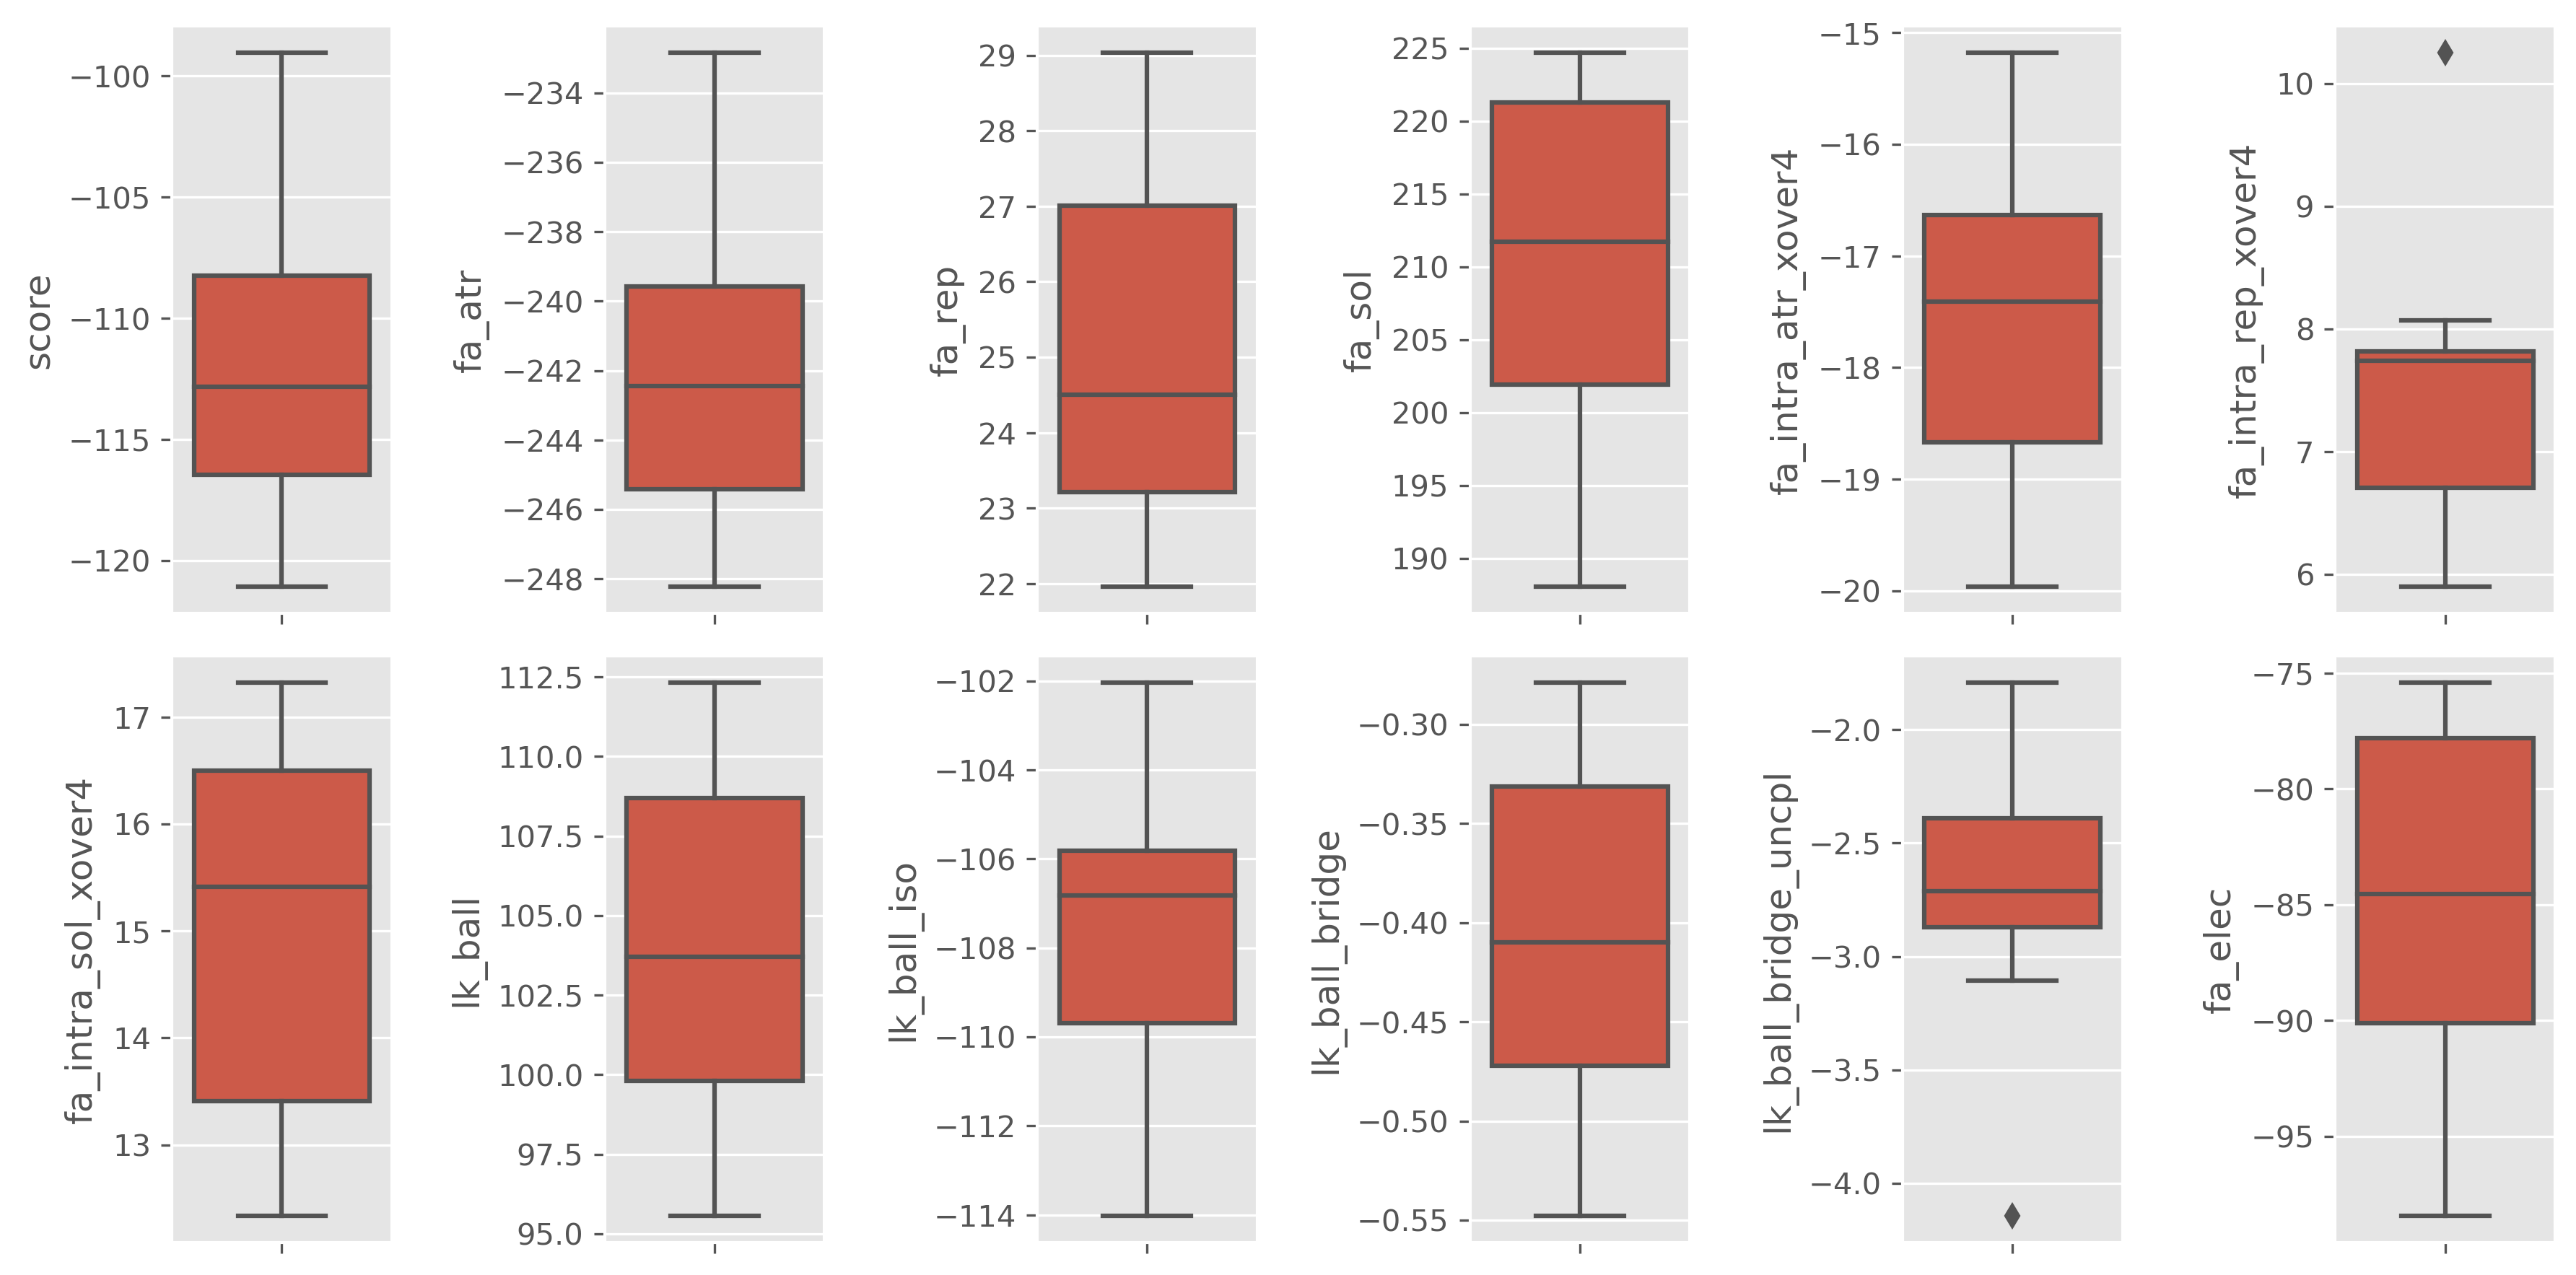

In [12]:
# plot的score选定(此处我们关注4个score)
# values = ["score", "hbond_sr_bb", "fa_elec", "hbond_bb_sc", "rama_prepro", "lk_ball"]

values = list(raw_df.columns)[:12]

# 定义图表
fig  = plt.figure(figsize=(12, 6))
grid = [2, 6]  # 第一个数值代表行数量，第二个数值代表列数量，共计可放入2x3项score。

# 制图
axes = rs.plot.multiple_distributions(df=raw_df, fig=fig, grid=grid, values=values)

# 展示
plt.tight_layout()
plt.show()

**举例B：不同组设计的指标比较**

假设目前我们有两种设计方法，我们想比对这两种方法设计得到的序列或其他特征分布的比较。

In [13]:
# 读取两组不同方法设计得到的计算结果: (这里为了方便，假装不一样吧。。)
silent_file = './data/design_result.silent'
method1_df = parse_rosetta_file(silent_file, rules)
method1_df = rs.utils.add_column(method1_df, 'design_method', 'fastdesign')

method2_df = parse_rosetta_file(silent_file, rules)
method2_df = rs.utils.add_column(method2_df, 'design_method', 'random')

# 合并df;
new_df = pd.concat([method1_df, method2_df], ignore_index=False)

开始作图比较:

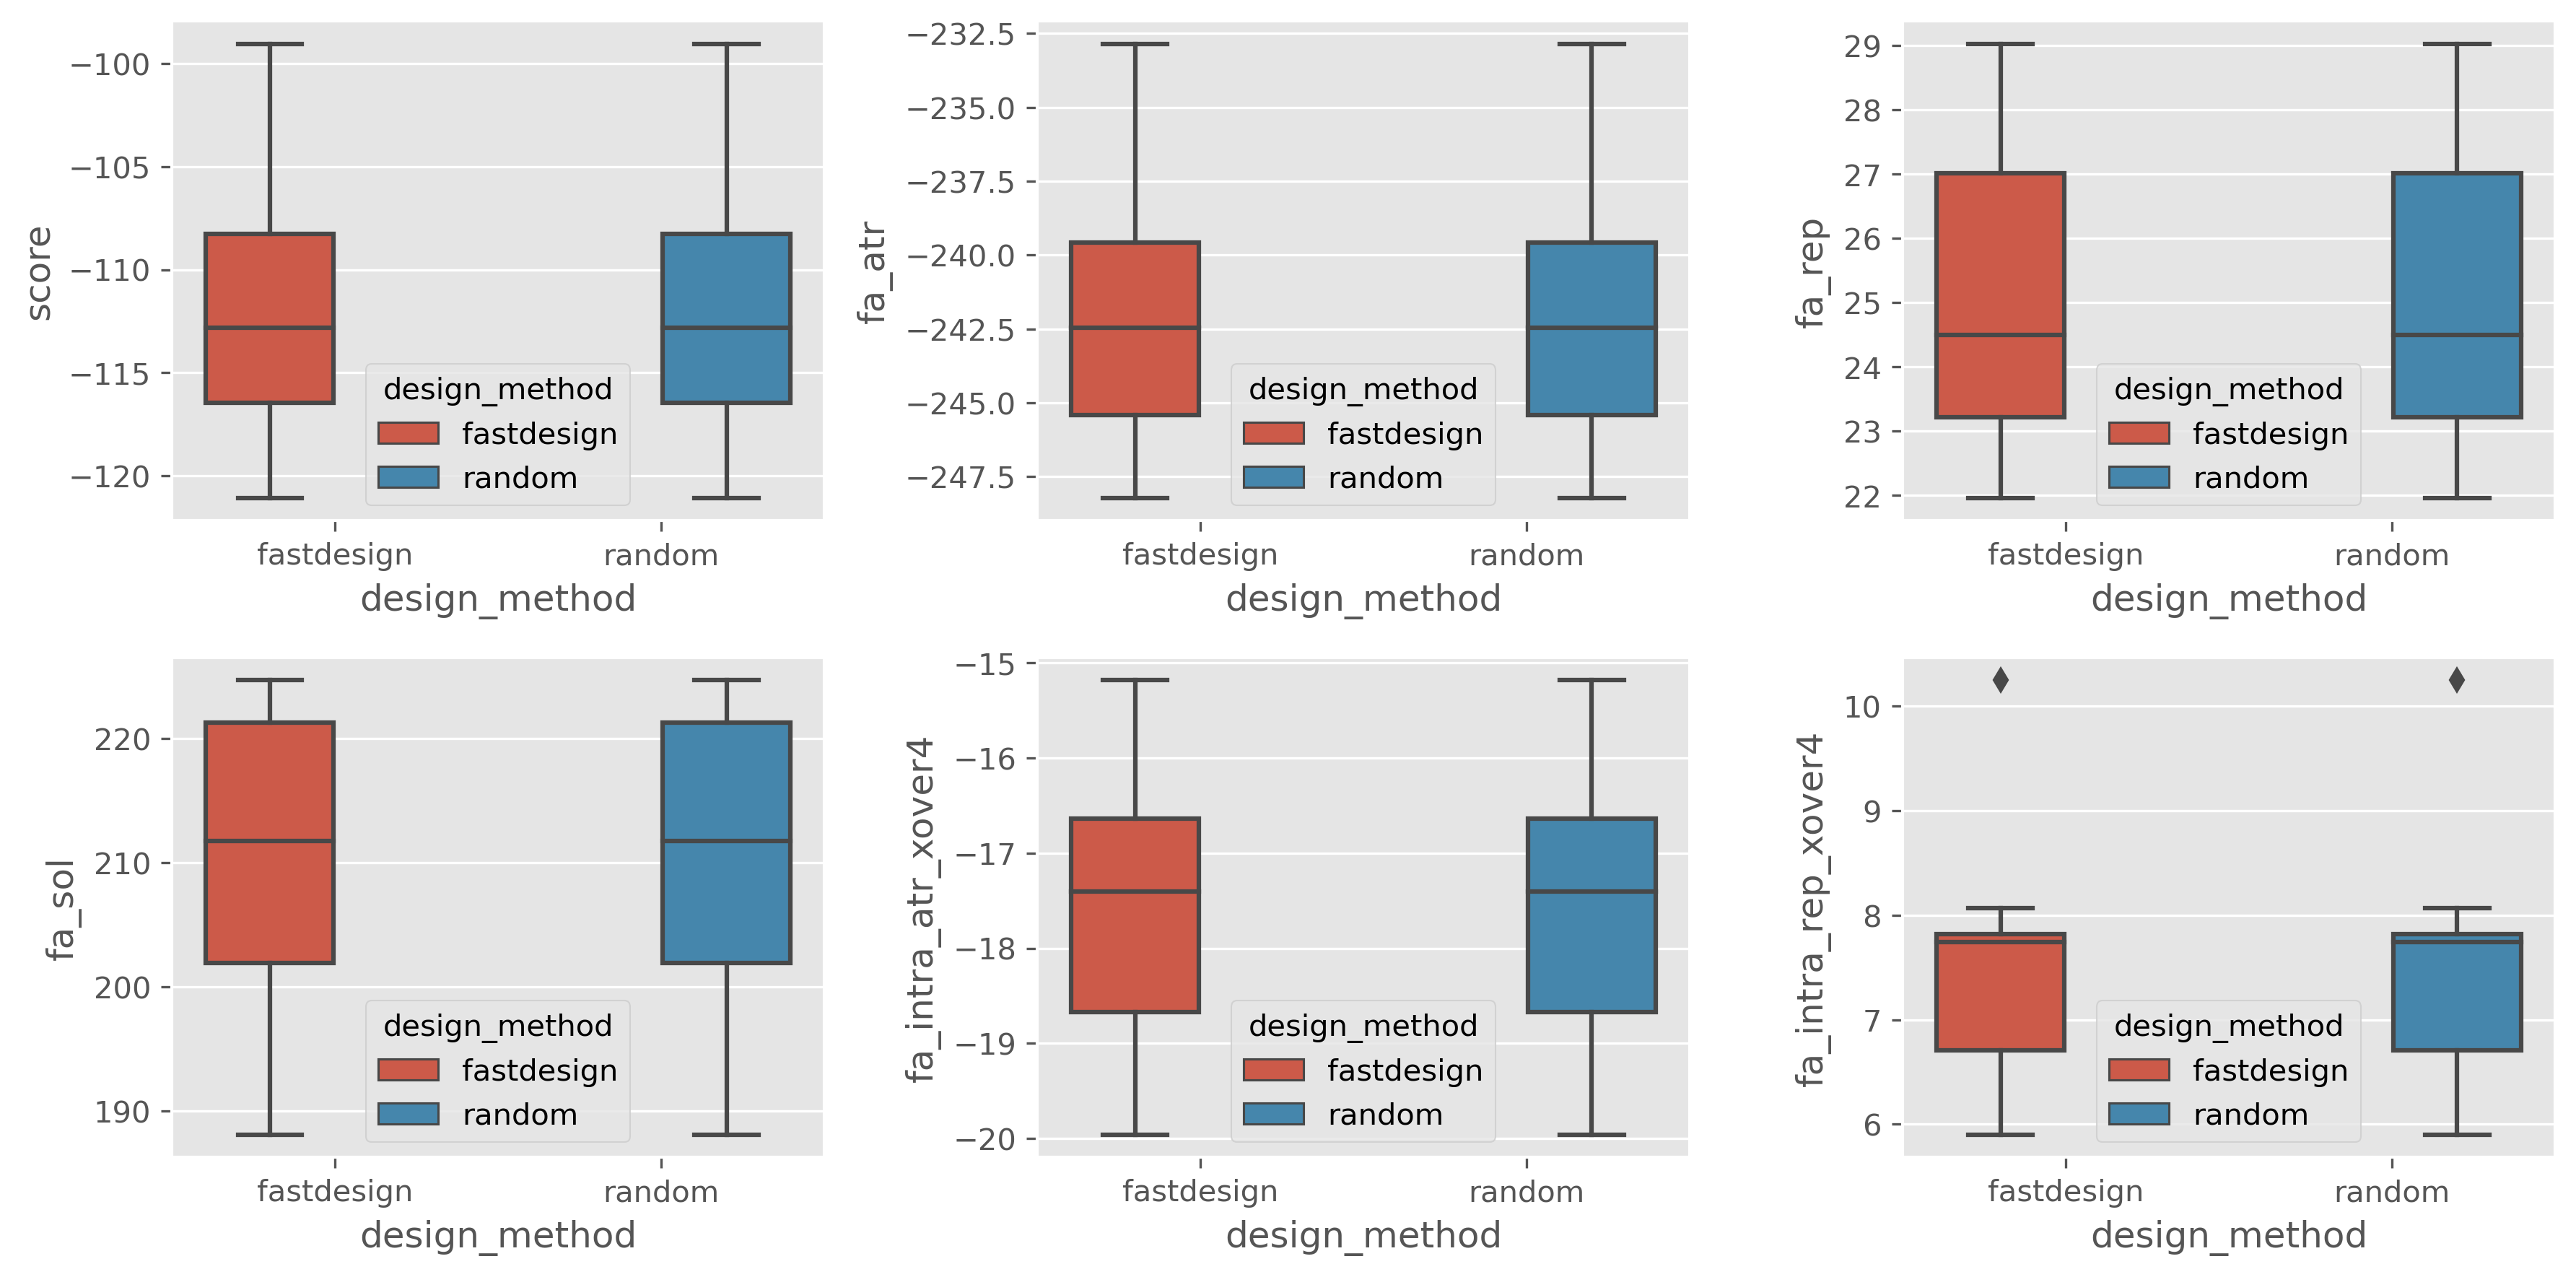

In [14]:
# 选取需要比较的metrics;
values = list(raw_df.columns)[:6]

# 定义图表
fig  = plt.figure(figsize=(12, 6))
grid = [2, 3]  # 第一个数值代表行数量，第二个数值代表列数量，共计可放入2x3项score。

# 制图
axes = rs.plot.multiple_distributions(df=new_df, fig=fig, grid=grid, values=values, x='design_method', hue='design_method',)

# 展示
plt.tight_layout()
plt.show()

除了从两个silent文件中读取dataframe，比较分布也可以从不同的df_selection子集中进行添加标签与合并数据:

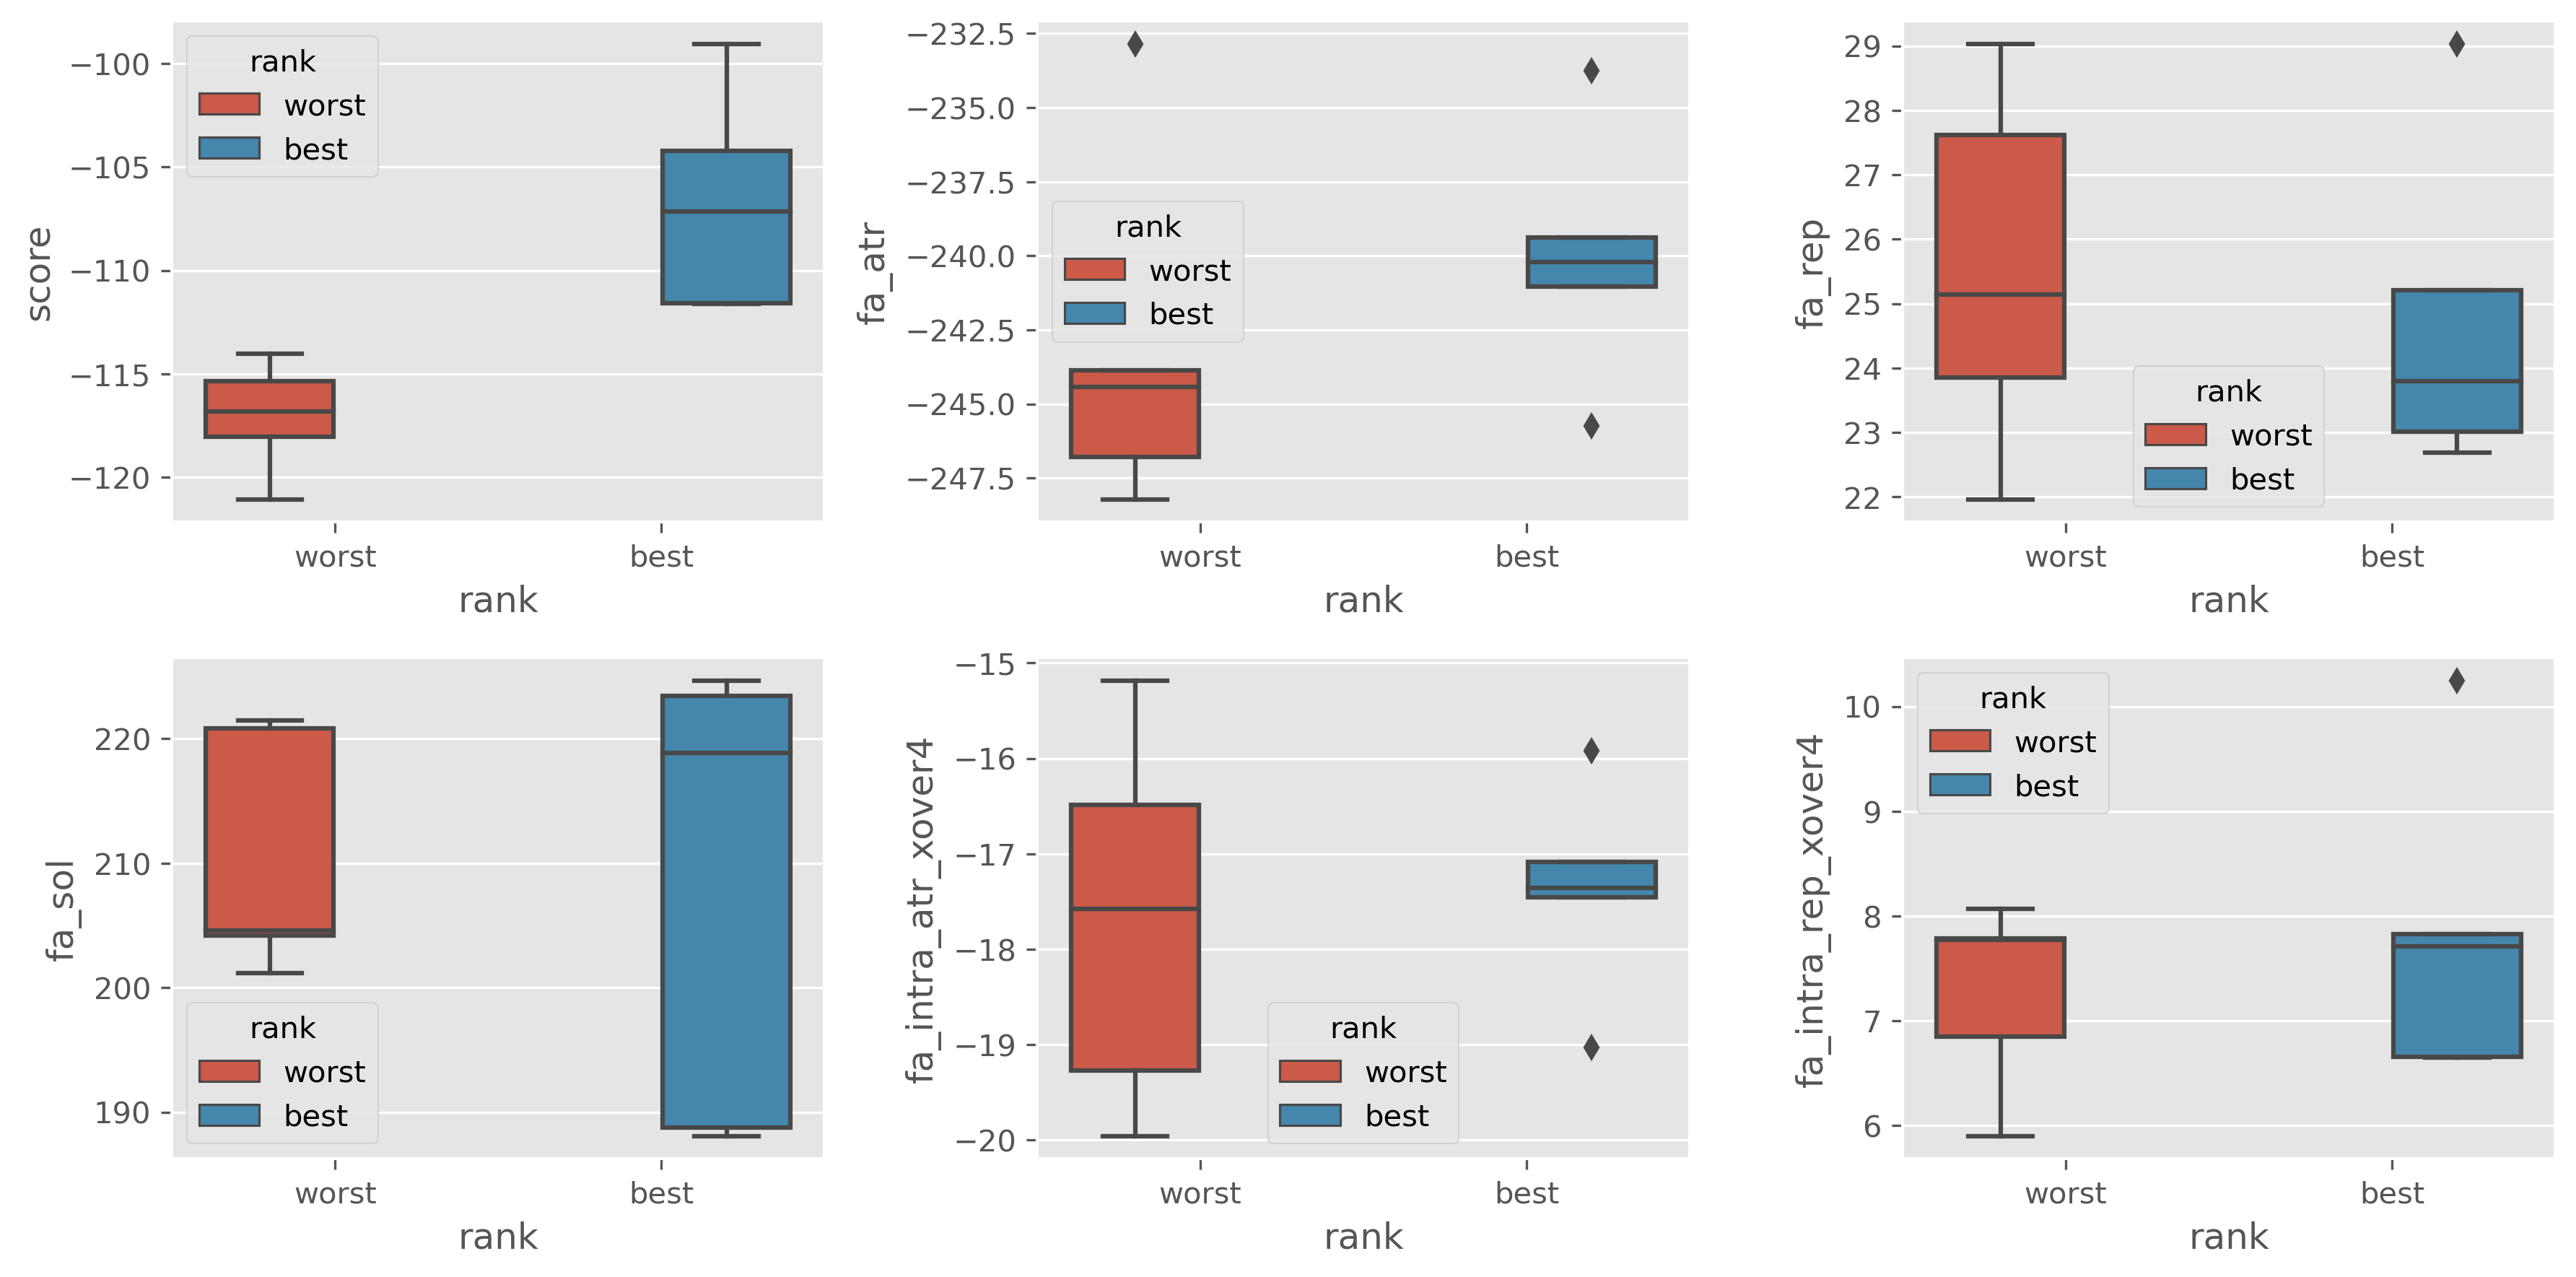

In [15]:
# 从选择语句:
df_selection4
df_selection4 = rs.utils.add_column(df_selection4, 'rank', 'worst')

df_selection5
df_selection5 = rs.utils.add_column(df_selection5, 'rank', 'best')

# 合并df;
new_df2 = pd.concat([df_selection4, df_selection5], ignore_index=False)

# 选取需要比较的metrics;
values = list(raw_df.columns)[:6]

# 定义图表
fig  = plt.figure(figsize=(12, 6))
grid = [2, 3]  # 第一个数值代表行数量，第二个数值代表列数量，共计可放入2x3项score。

# 制图
axes = rs.plot.multiple_distributions(df=new_df2, fig=fig, grid=grid, values=values, x='rank', hue='rank',)

# 展示
plt.tight_layout()
plt.show()

更多API参考链接: http://jaumebonet.cat/RosettaSilentToolbox/api.html

#### 3.4 从silent中分离pdb文件
通过pyrosetta API，可以结合rstoolbox过滤筛选后的DataFrame信息，分离对应我们需要的PDB结构（无论是做后续的分析还是视觉观察、结构作图等）。

In [16]:
from pyrosetta.io import poses_from_silent

# 读取silent;
poses = poses_from_silent(silent_file)

# 按照全面筛选的到的data.
df_selection5

# 获取description列信息:
selected_pdb_list = list(df_selection5['description'])
print(selected_pdb_list)

['EHPC100_job_77_hhh_11.5.10.5.10_20201122032833.pdb', 'EHPC100_job_77_hhh_11.5.10.5.10_20201122032313.pdb', 'EHPC100_job_77_hhh_11.5.10.5.10_20201122032428.pdb', 'EHPC100_job_77_hhh_11.5.10.5.10_20201122032822.pdb', 'EHPC100_job_77_hhh_11.5.10.5.10_20201122032955.pdb']


In [17]:
# 分离结构:
import os

for pose in poses:
    # 获取pose中的description信息;
    description = pose.pdb_info().name()
    if description in selected_pdb_list:
        pose.dump_pdb(os.path.join('./data', description))

core.io.silent.SilentFileData: {0} Reading all structures from ./data/design_result.silent
core.io.silent: {0} [ WARNING ] Skipping duplicate sequence declaration
core.io.silent: {0} [ WARNING ] Skipping duplicate sequence declaration
core.io.silent: {0} [ WARNING ] Skipping duplicate sequence declaration
core.io.silent: {0} [ WARNING ] Skipping duplicate sequence declaration
core.io.silent: {0} [ WARNING ] Skipping duplicate sequence declaration
core.io.silent: {0} [ WARNING ] Skipping duplicate sequence declaration
core.io.silent: {0} [ WARNING ] Skipping duplicate sequence declaration
core.io.silent: {0} [ WARNING ] Skipping duplicate sequence declaration
core.io.silent: {0} [ WARNING ] Skipping duplicate sequence declaration
core.io.silent.SilentFileData: {0} Finished reading 10 structures from ./data/design_result.silent
core.chemical.GlobalResidueTypeSet: {0} Finished initializing fa_standard residue type set.  Created 984 residue types
core.chemical.GlobalResidueTypeSet: {0} Tot

#### 3.5 从df中直接输出Fasta文件

In [18]:
from rstoolbox.io import read_fasta, write_fasta
df_selection5

,score,fa_atr,fa_rep,fa_sol,fa_intra_atr_xover4,fa_intra_rep_xover4,fa_intra_sol_xover4,lk_ball,lk_ball_iso,lk_ball_bridge,...,nres_sheet,nres_total,percent_core,ss_mismatch_probability,PHI,PSI,SSE,description,sequence_A,rank
7,-111.605,-241.044,29.032,188.744,-17.360,7.708,13.119,95.556,-102.038,-0.335,...,0.0,43.0,0.186,0.335,"0.0,-61.816026473581395,-60.87873427386993,-64.51024770761043,-63.10392233294926,-64.23482012032534,-64.680874248356,-60.66961314351576,-71.64463978334865,-63.24105965575744,-68.51336264921207,-87.40874592621869,52.85547148280792,-66.37135130048894,-159.28162388186527,-72.04898204335726,-91.23362478670171,-59.19866149020611,-70.40617266813769,-69.41468304560698,-64.35874575364411,-63.02918602763617,-61.24466252896299,-60.56573364691166,-66.43755382418904,-72.25860023352529,-66.28395963794418,-87.08050049367311,54.3695702401474,-99.04581680264154,-104.37947103434662,50.59528408561853,-68.21538426658607,-67.12484362281268,-66.47994182018405,-61.428431832870345,-66.59170804313756,-66.229930924608,-62.46970952055127,-62.91998644731243,-66.55357012253441,-64.34196161315106,104.4673399414333","115.99844970876589,-37.54483533122744,-43.79033726430612,-42.33399027064176,-39.63509633907059,-46.13586564515068,-39.62586069732336,-40.02115810065967,-43.597573295722896,-31.508669700612042,-13.493978955523716,-4.813174407090667,58.97031925478837,-22.27680664176824,177.99664528032784,-10.477330060180872,1.265725177997705,-27.14115361849895,-30.681013517424013,-32.61183114514764,-46.83765846926104,-42.68357484593599,-46.187160289435205,-47.060519436449425,-30.670942054519475,-51.41204082569745,-34.63503503189473,3.9149217565832197,43.50019502443131,-34.696627768614924,-22.945302628210737,-123.52096880255584,-21.947745499194514,-51.95328061082064,-35.67083657211858,-47.92772919130619,-42.27368173394641,-45.14734723283217,-41.7848860485962,-40.029111067566824,-38.54908540192382,-41.05432821808837,0.0",LHHHHHHHHHHHLLLHHHHHHHHHHHHLLLLLHHHHHHHHHHL,EHPC100_job_77_hhh_11.5.10.5.10_20201122032833.pdb,TEVEEILKRAAKKPDHKFREIFRELIERNLANELAKQILKELG,best
1,-111.579,-239.381,25.203,188.087,-15.924,10.248,12.333,102.075,-103.115,-0.478,...,0.0,43.0,0.349,0.267,"0.0,-64.3519467853161,-63.418086930463815,-65.56673176992616,-62.937028353387916,-64.84600479810152,-60.46768276861964,-64.99142204050862,-59.049636840404,-63.18631177283314,-58.85645964636771,-64.35015465192834,-97.54005666361657,-52.86373021885636,100.75694461007625,-71.36374889851632,-72.82703291356235,-61.32485242033397,-64.54206754213402,-64.50010229369639,-64.6732629210743,-57.12234914566474,-61.09981426241765,-64.47279134871839,-62.10672300145529,-66.14427121037937,-66.00261452846901,-68.06192326827916,-69.68543652922278,91.85104777792408,-81.18992895090004,-109.41994732519733,-61.87846575537298,-61.974640237969076,-65.06401434230709,-62.69618238650833,-58.63360441093861,-57.32725924615807,-58.089019700406446,-63.92901632178451,-78.36838629831337,-67.86420289769583,-89.24805136111644","135.29049056466624,-44.3565372650317,-39.44213431209112,-39.813270032614355,-44.34201877339164,-43.534511504796356,-41.92051977907319,-40.62558720133791,-44.1940958663573,-43.6038936284092,-48.88955537867602,-34.80524214505524,18.73689667446474,134.23485792624905,-14.193883138670655,156.87051590470855,163.20839740726998,-37.125238128619756,-41.06313289927764,-43.28759722099899,-41.801725412414605,-48.76218444761745,-43.068821843732735,-40.55155304541878,-38.54489931440367,-36.85904541676932,-35.12446892323645,125.3914543230007,145.65503193618588,-8.208151559667714,126.69306929503253,-174.3708053732862,-38.44431561898169,-46.07858141526455,-37.39032838784732,-45.66377989383726,-40.39137357798858,-48.76846703504008,-38.57259568994066,-33.276471026442586,-34.93916532435953,-38.69601513404585,0.0",LHHHHHHHHHHHLLLLLHHHHHHHHHHLLLLLHHHHHHHHHHL,EHPC100_job_77_hhh_11.5.10.5.10_20201122032313.pdb,SVEEIVKKMIKKASGASREQIKKLAEKIPGVDERVIKMAERLI,best
2,-107.145,-245.738,23.800,223.426,-17.090,6.658,15.02

In [19]:
# 保存至Fasta文件中:
content = write_fasta(df_selection5, "A")
with open('./data/design_decoy.fasta', 'w') as f:
    f.write(content)